In [17]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import random
from quantumNetwork import QuantumNetwork
from qTable import QTable
import matplotlib.pyplot as plt


In [64]:
# Network Parameters
initial_edges = [(0, 2), (1, 2), (2, 3), (3, 4), (3, 5)]
goalWeights = [((0, 4), 0.9), ((1, 5), 0.1)]
random.seed(42)

# N-Step Parameters
totalTimesteps = 100
nStep = 3 # 4 is really only 3 steps ahead
gamma = 0.99
epsilon = 0.1
alpha = 0.1

# Initialize Network & Q-Table
network = QuantumNetwork(initial_edges, goalWeights=goalWeights, pGen=0.7, pSwap=1, maxAge=3)
qTable = QTable(default_q_value=0.0)

# Logging
logRewards = []
edrLogs = {goal_edge: [] for goal_edge, _ in goalWeights}  # Initialize as dictionary
log_interval = 10
# Initialize lists for n-step SARSA
states = []
actions = []
rewards = []

for t in range(totalTimesteps):
    # Take an action accordint to pi(*| S_t)
    current_action = network.getActionEpsilonGreedyPolicy(qTable, network.getState(), epsilon)
    # Observe and store the reward as R_t+1 and the next state as S_t+1
    rewards.append(network.getActionReward(current_action))
    states.append(network.getState())
    
    # Next timestep
    network._updateGoalEntanglementRates(current_action[1])
    network.timestep += 1
    network.ageEntanglements()
    network.generateGlobalEntanglementsProbabalistically()
    
    if t % log_interval == 0:
        for goal_edge, _ in goalWeights:
            edr = network.getGoalRate(goal_edge)
            edrLogs[goal_edge].append(edr)
        logRewards.append(reward)
        if t % 10000 == 0:
            print(f"Time: {t}")
    
    
    tau = t - nStep + 1
    if tau >= 0:
        print(tau, t)
        G = 0
        for i in range(tau + 1, min(tau + nStep+1, totalTimesteps+1)):
            G += (gamma ** (i - tau - 1)) * rewards[i - 1]

        if tau + nStep < totalTimesteps:
            print(tau + nStep)
            print(len(states))
            G += (gamma ** (nStep - 1)) * qTable.get_q_value(states[tau + nStep - 2], actions[tau + nStep - 2])
        
        # V(S_t) <- V(S_t) + alpha * (G - V(S_t)) # Where V(S_t) is the Q-value of the current state-action pair
        current_q = qTable.get_q_value(states[tau], actions[tau])
        new_q = current_q + alpha * (G - current_q)
    
        qTable.update_q_value(states[tau], actions[tau], new_q)
    

Time: 0
0 2
3
3


IndexError: list index out of range

In [25]:
print(states)
print(rewards)
print(actions)

[{}, {(0, 2): 0, (1, 2): 0, (2, 3): 0, (3, 5): 0}, {(0, 2): 1, (1, 2): 1, (2, 3): 1, (3, 5): 1, (3, 4): 0}, {(0, 2): 2, (1, 2): 2, (2, 3): 2, (3, 5): 2, (3, 4): 1}, {(0, 2): 3, (1, 2): 3, (2, 3): 3, (3, 5): 3, (3, 4): 2}, {(0, 2): 0, (1, 2): 0, (2, 3): 0, (3, 4): 3, (3, 5): 0}, {(0, 2): 1, (1, 2): 1, (2, 3): 1, (3, 5): 1, (3, 4): 0}, {(0, 2): 2, (1, 2): 2, (2, 3): 2, (3, 5): 2, (3, 4): 1}, {(0, 2): 3, (1, 2): 3, (2, 3): 3, (3, 5): 3, (3, 4): 2}, {(0, 2): 0, (1, 2): 0, (2, 3): 0, (3, 4): 3, (3, 5): 0}, {(0, 2): 1, (1, 2): 1, (2, 3): 1, (3, 5): 1, (3, 4): 0}, {(0, 2): 2, (1, 2): 2, (2, 3): 2, (3, 5): 2, (3, 4): 1}, {(0, 2): 3, (1, 2): 3, (2, 3): 3, (3, 5): 3, (3, 4): 2}, {(0, 2): 0, (1, 2): 0, (3, 4): 3}, {(0, 2): 1, (1, 2): 1, (3, 4): 0, (3, 5): 0}, {(0, 2): 2, (1, 2): 2, (3, 4): 1, (3, 5): 1}, {(0, 2): 3, (1, 2): 3, (2, 3): 0, (3, 4): 2, (3, 5): 2}, {(0, 2): 0, (1, 2): 0, (2, 3): 1, (3, 4): 3, (3, 5): 3}, {(0, 2): 1, (1, 2): 1, (2, 3): 2, (3, 5): 0}, {(0, 2): 2, (1, 2): 2, (2, 3): 3, (

In [20]:
# After training, to see extreme Q-values
for state in qTable.q_table:
    # Get all actions and their values for this state
    actions_and_values = qTable.getActionAndValues(dict(state))
    
    # Sort by Q-value
    sorted_values = sorted(actions_and_values, key=lambda x: x[1])
    
    # Print highest and lowest for this state
    if len(sorted_values) > 0:
        print(f"\nState: {dict(state)}")
        print(f"Highest Q-value: {sorted_values[-1][1]:.4f}, Action: {sorted_values[-1][0]}")
        print(f"Lowest Q-value: {sorted_values[0][1]:.4f}, Action: {sorted_values[0][0]}")
        print("-" * 50)


State: {}
Highest Q-value: 0.0000, Action: ([], None)
Lowest Q-value: 0.0000, Action: ([], None)
--------------------------------------------------

State: {(0, 2): 0, (1, 2): 0, (2, 3): 0, (3, 5): 0}
Highest Q-value: 0.0000, Action: ([(1, 2), (2, 3), (3, 5)], (1, 5))
Lowest Q-value: 0.0000, Action: ([(1, 2), (2, 3), (3, 5)], (1, 5))
--------------------------------------------------

State: {(0, 2): 1, (1, 2): 1, (2, 3): 1, (3, 4): 0, (3, 5): 1}
Highest Q-value: 0.0000, Action: ([], None)
Lowest Q-value: 0.0000, Action: ([], None)
--------------------------------------------------

State: {(0, 2): 2, (1, 2): 2, (2, 3): 2, (3, 4): 1, (3, 5): 2}
Highest Q-value: 0.0000, Action: ([(0, 2), (2, 3), (3, 4)], (0, 4))
Lowest Q-value: 0.0000, Action: ([(0, 2), (2, 3), (3, 4)], (0, 4))
--------------------------------------------------

State: {(0, 2): 3, (1, 2): 3, (2, 3): 3, (3, 4): 2, (3, 5): 3}
Highest Q-value: 0.0000, Action: ([(1, 2), (2, 3), (3, 5)], (1, 5))
Lowest Q-value: 0.0000, Acti

[np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.float64(1.0986122886681098), np.floa

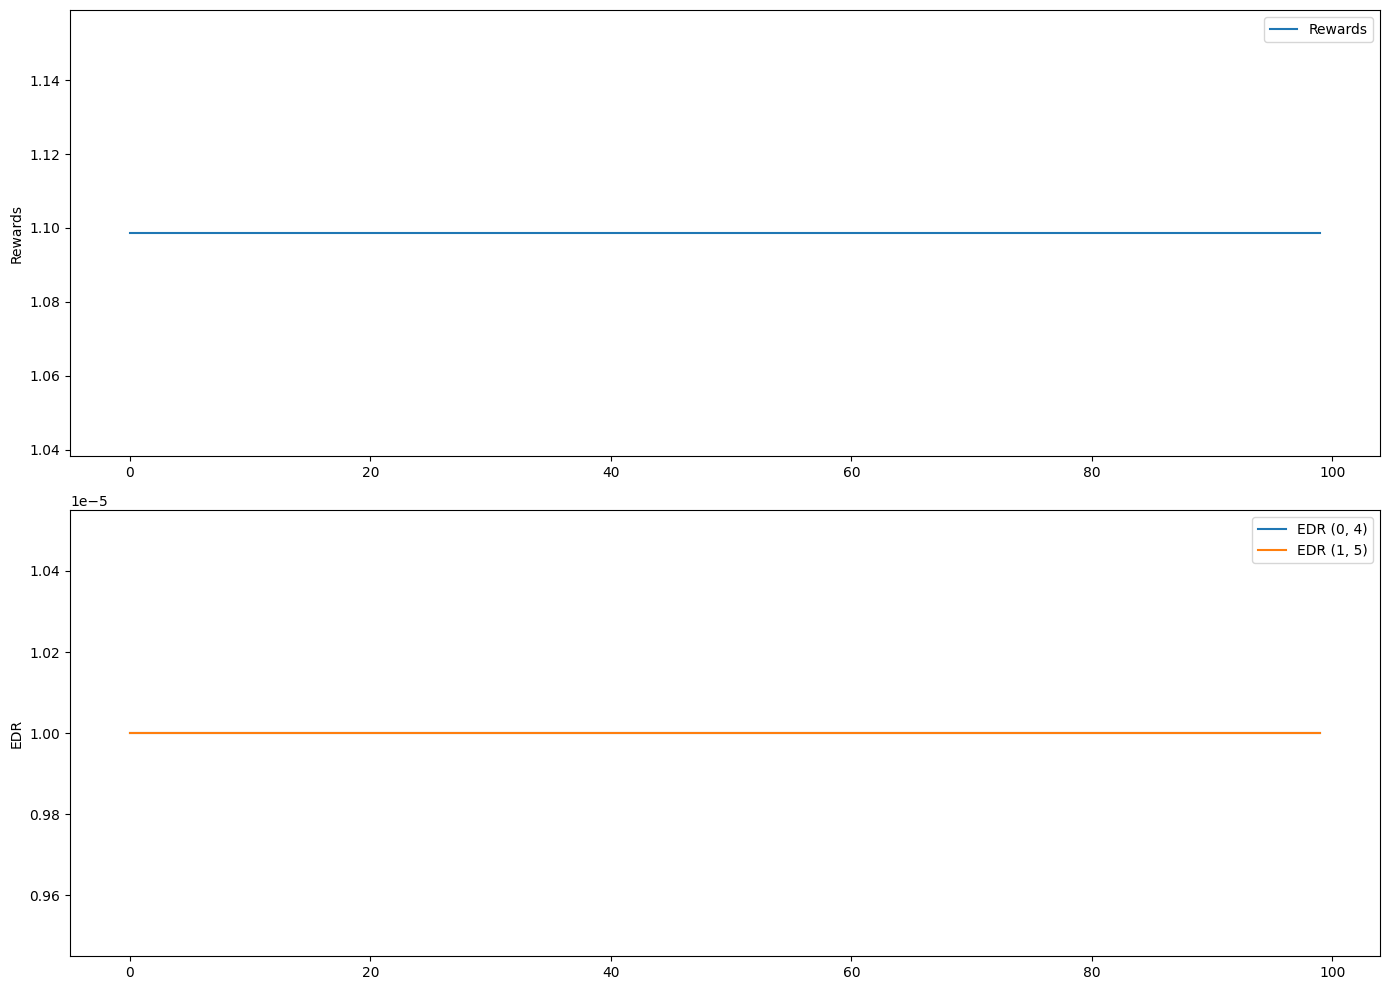

In [21]:
print(logRewards)
print(edrLogs)
# Plot rewards and EDRs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot rewards
ax1.plot(logRewards, label='Rewards')
ax1.set_ylabel('Rewards')
ax1.legend()

# Plot EDRs for each goal edge
for goal_edge, edrs in edrLogs.items():
    ax2.plot(edrs, label=f'EDR {goal_edge}')
ax2.set_ylabel('EDR')
ax2.legend()

plt.tight_layout()
plt.show()